In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a_df=pd.read_csv(r"C:\Users\kandu\OneDrive\Desktop\olympics\athlete_events.csv")
noc_df=pd.read_csv(r"C:\Users\kandu\OneDrive\Desktop\olympics\noc_regions.csv")


In [3]:
a_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
a_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
a_df.shape

(271116, 15)

In [7]:
a_df=a_df.merge(noc_df,on='NOC',how='left')

## Winter dataset

In [8]:
winter_df=a_df[a_df['Season']=='Winter']# winter dataset
winter_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [9]:
winter_df.isnull().sum()

ID            0
Name          0
Sex           0
Age         285
Height     8314
Weight     9021
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     42869
region        0
notes     47926
dtype: int64

In [10]:
winter_df.duplicated().sum()


0

In [11]:
winter_df.drop_duplicates(inplace=True)
winter_df.duplicated().sum()

C:\Users\kandu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [12]:
winter_df['Medal'].value_counts()

Gold      1913
Silver    1896
Bronze    1886
Name: Medal, dtype: int64

In [13]:
winter_athe_df=pd.concat([winter_df,pd.get_dummies(winter_df['Medal'])],axis=1)
winter_athe_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [14]:
winter_athe_df.shape

(48564, 20)

In [15]:
winter_athe_df=winter_athe_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [16]:
winter_athe_df['Total']=winter_athe_df['Gold']+winter_athe_df['Silver']+winter_athe_df['Bronze']

In [17]:
winter_athe_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,...,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,...,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,...,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271094,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,...,Nagano,Speed Skating,"Speed Skating Men's 1,500 metres",NaN,Poland,NaN,0,0,0,0
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,...,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0,0
271096,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,...,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Poland,NaN,0,0,0,0
271097,135559,Pawe Jan Zygmunt,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,...,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN,Poland,NaN,0,0,0,0


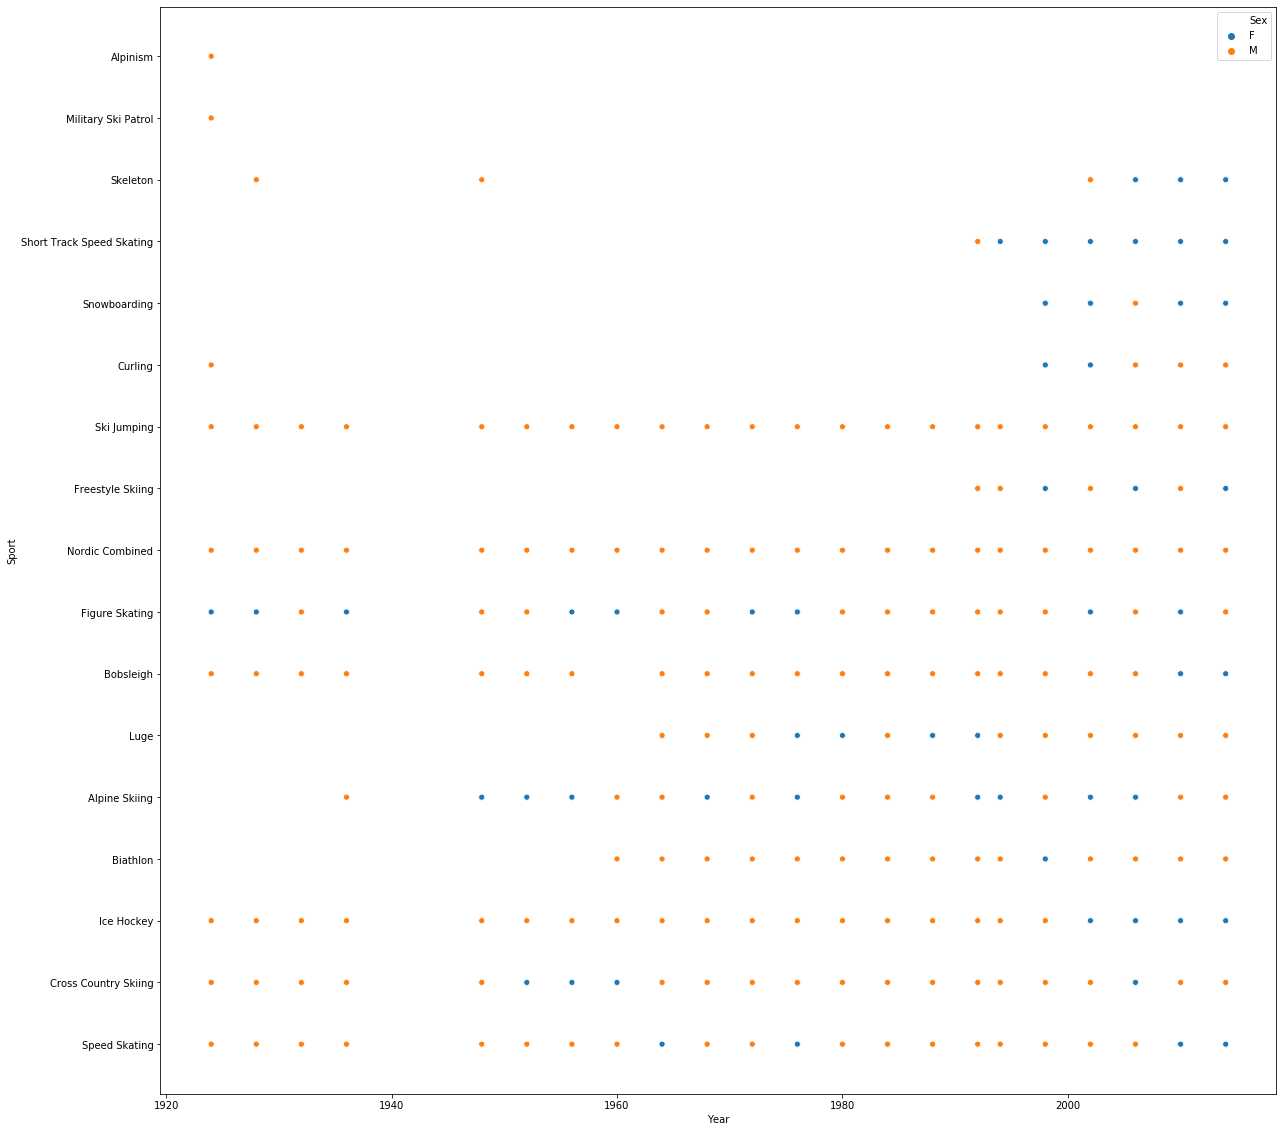

In [18]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Year',y='Sport',hue='Sex',data=winter_athe_df)
plt.show()

## Olympics Analysis for winter

### County_wise Medal

In [19]:
def Country_wise(Country):
    a =winter_athe_df[winter_athe_df['NOC'] ==Country]
    b=a.groupby('NOC').sum()[['Gold','Silver','Bronze','Total']].sort_values('Gold',ascending=False).reset_index()
    return b

Country_wise('IND')

,NOC,Gold,Silver,Bronze,Total
0,IND,1,0,0,1


### region_wise Medal

In [20]:
def Region_wise(Country):
    a = winter_athe_df[winter_athe_df['region'] == Country]
    b=a.groupby(['Year','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b

Region_wise('India')


,Year,region,Gold,Silver,Bronze
0,1924,India,1,0,0
1,1964,India,0,0,0
2,1968,India,0,0,0
3,1988,India,0,0,0
4,1992,India,0,0,0
5,1998,India,0,0,0
6,2002,India,0,0,0
7,2006,India,0,0,0
8,2010,India,0,0,0
9,2014,India,0,0,0


### Event_wise Medal

In [21]:
def Event_wise(Country):
    a = winter_athe_df[winter_athe_df['region']==Country]
    b=a.groupby(['Year','Event','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Event_wise("India")


,Year,Event,region,Gold,Silver,Bronze
0,1924,Alpinism Mixed Alpinism,India,1,0,0
1,1964,Alpine Skiing Men's Downhill,India,0,0,0
2,1968,Alpine Skiing Men's Downhill,India,0,0,0
3,1968,Alpine Skiing Men's Giant Slalom,India,0,0,0
4,1968,Alpine Skiing Men's Slalom,India,0,0,0
5,1988,Alpine Skiing Men's Slalom,India,0,0,0
6,1988,Alpine Skiing Women's Slalom,India,0,0,0
7,1992,Alpine Skiing Men's Giant Slalom,India,0,0,0
8,1992,Alpine Skiing Men's Slalom,India,0,0,0
9,1998,Luge Men's Singles,India,0,0,0


### Name-Wise Medal

In [22]:
def Name_wise(Country):
    a = winter_athe_df[winter_athe_df['region'] == Country]
    b=a.groupby(['Year','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Name_wise('India')

,Year,Name,Gold,Silver,Bronze
0,1924,Antarge Sherpa,1,0,0
1,1964,Jeremy John (Jarema Stanisaw-) Bujakowski,0,0,0
2,1968,Jeremy John (Jarema Stanisaw-) Bujakowski,0,0,0
3,1988,Gul Mustafa Dev,0,0,0
4,1988,Shailaja N. Kumar,0,0,0
5,1992,Lal Chuni,0,0,0
6,1998,Shiva Keshavan,0,0,0
7,2002,Shiva Keshavan,0,0,0
8,2006,Bahadur Gurung Gupta,0,0,0
9,2006,Hira Lal,0,0,0


### City_wise Player

In [23]:
def City_wise(Country):
    a = winter_athe_df[winter_athe_df['region'] == Country]
    b=a.groupby(['Name','City','Medal']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
City_wise('India')


,Name,City,Medal,Gold,Silver,Bronze
0,Antarge Sherpa,Chamonix,Gold,1,0,0


### Sport_wise Medal & Player 

In [24]:
def Sport_wise(Country):
    a = winter_athe_df[winter_athe_df['region'] == Country]
    b=a.groupby(['Sport','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Sport_wise('India')

,Sport,Name,Gold,Silver,Bronze
0,Alpine Skiing,Gul Mustafa Dev,0,0,0
1,Alpine Skiing,Himanshu Thakur,0,0,0
2,Alpine Skiing,Hira Lal,0,0,0
3,Alpine Skiing,Jamyang Namgial,0,0,0
4,Alpine Skiing,Jeremy John (Jarema Stanisaw-) Bujakowski,0,0,0
5,Alpine Skiing,Lal Chuni,0,0,0
6,Alpine Skiing,Neha Ahuja,0,0,0
7,Alpine Skiing,Shailaja N. Kumar,0,0,0
8,Alpinism,Antarge Sherpa,1,0,0
9,Cross Country Skiing,Bahadur Gurung Gupta,0,0,0


### Total_info

In [25]:
def Info_wise(Country):
    a = winter_athe_df[winter_athe_df['region'] == Country]
    b=a.groupby(['Year','Name','Event','City','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b
Info_wise("India")


,Year,Name,Event,City,region,Gold,Silver,Bronze
0,1924,Antarge Sherpa,Alpinism Mixed Alpinism,Chamonix,India,1,0,0
1,1964,Jeremy John (Jarema Stanisaw-) Bujakowski,Alpine Skiing Men's Downhill,Innsbruck,India,0,0,0
2,1968,Jeremy John (Jarema Stanisaw-) Bujakowski,Alpine Skiing Men's Downhill,Grenoble,India,0,0,0
3,1968,Jeremy John (Jarema Stanisaw-) Bujakowski,Alpine Skiing Men's Giant Slalom,Grenoble,India,0,0,0
4,1968,Jeremy John (Jarema Stanisaw-) Bujakowski,Alpine Skiing Men's Slalom,Grenoble,India,0,0,0
5,1988,Gul Mustafa Dev,Alpine Skiing Men's Slalom,Calgary,India,0,0,0
6,1988,Shailaja N. Kumar,Alpine Skiing Women's Slalom,Calgary,India,0,0,0
7,1992,Lal Chuni,Alpine Skiing Men's Giant Slalom,Albertville,India,0,0,0
8,1992,Lal Chuni,Alpine Skiing Men's Slalom,Albertville,India,0,0,0
9,1998,Shiva Keshavan,Luge Men's Singles,Nagano,India,0,0,0


In [26]:
def Top_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Name','region']).sum()[['Gold','Silver','Bronze','Total']]
    c=b.sort_values('Total', ascending=False).reset_index()
    d=c.loc[0:14]
    return d


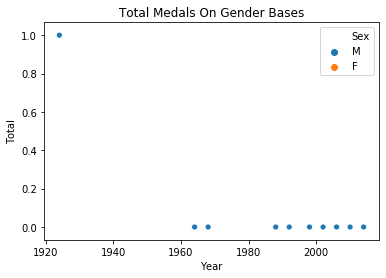

In [27]:
def scatter_plot(country):
    a = winter_athe_df[winter_athe_df['region'] == country]
    b = a.groupby(['Year','Sex']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c = sns.scatterplot(x=b['Year'], y=b['Total'], hue= b['Sex'])
    plt.title('Total Medals On Gender Bases')
    return c
scatter_plot('India')

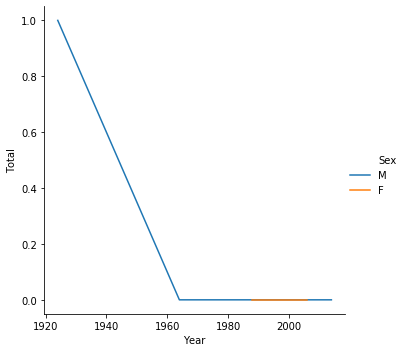

In [28]:
def country_lineplot(country):
    a = winter_athe_df[winter_athe_df['region'] == country]
    b=a.groupby(['Year','Sex']).sum()[['Gold','Silver','Bronze','Total']].reset_index()
    result=sns.relplot(x='Year', y='Total', hue='Sex',data=b,kind='line')
    return result
country_lineplot('India')

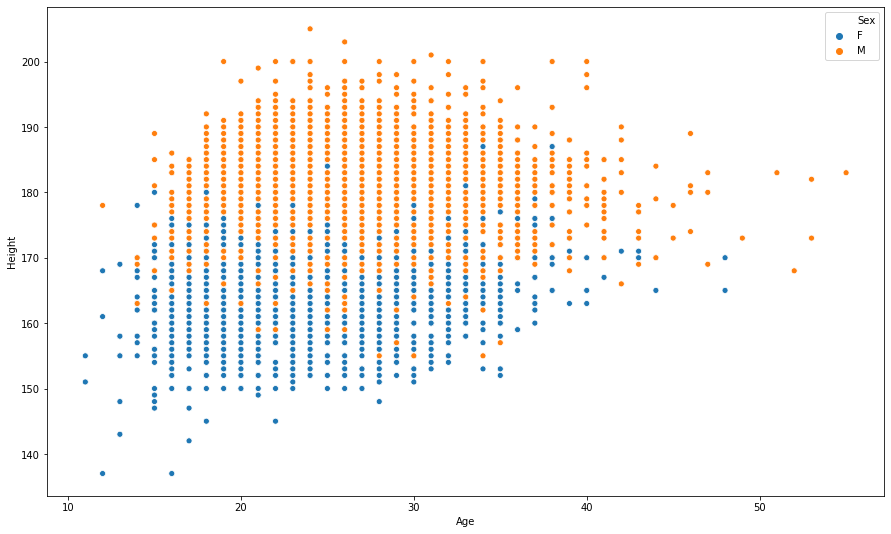

In [29]:
personality=winter_athe_df.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()

plt.figure(figsize=(15,9))
sns.scatterplot(x='Age',y='Height',hue='Sex',data=personality)



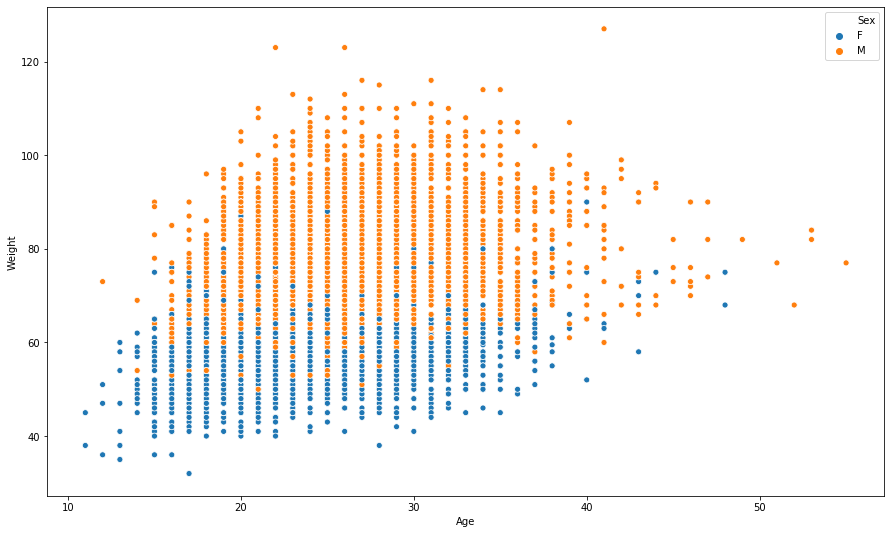

In [30]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age',y='Weight',hue='Sex',data=personality)

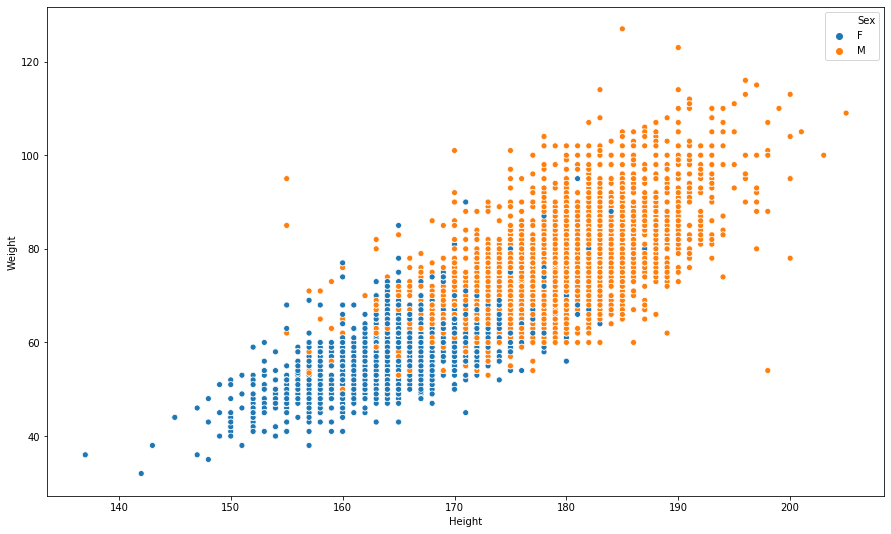

In [31]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=personality)

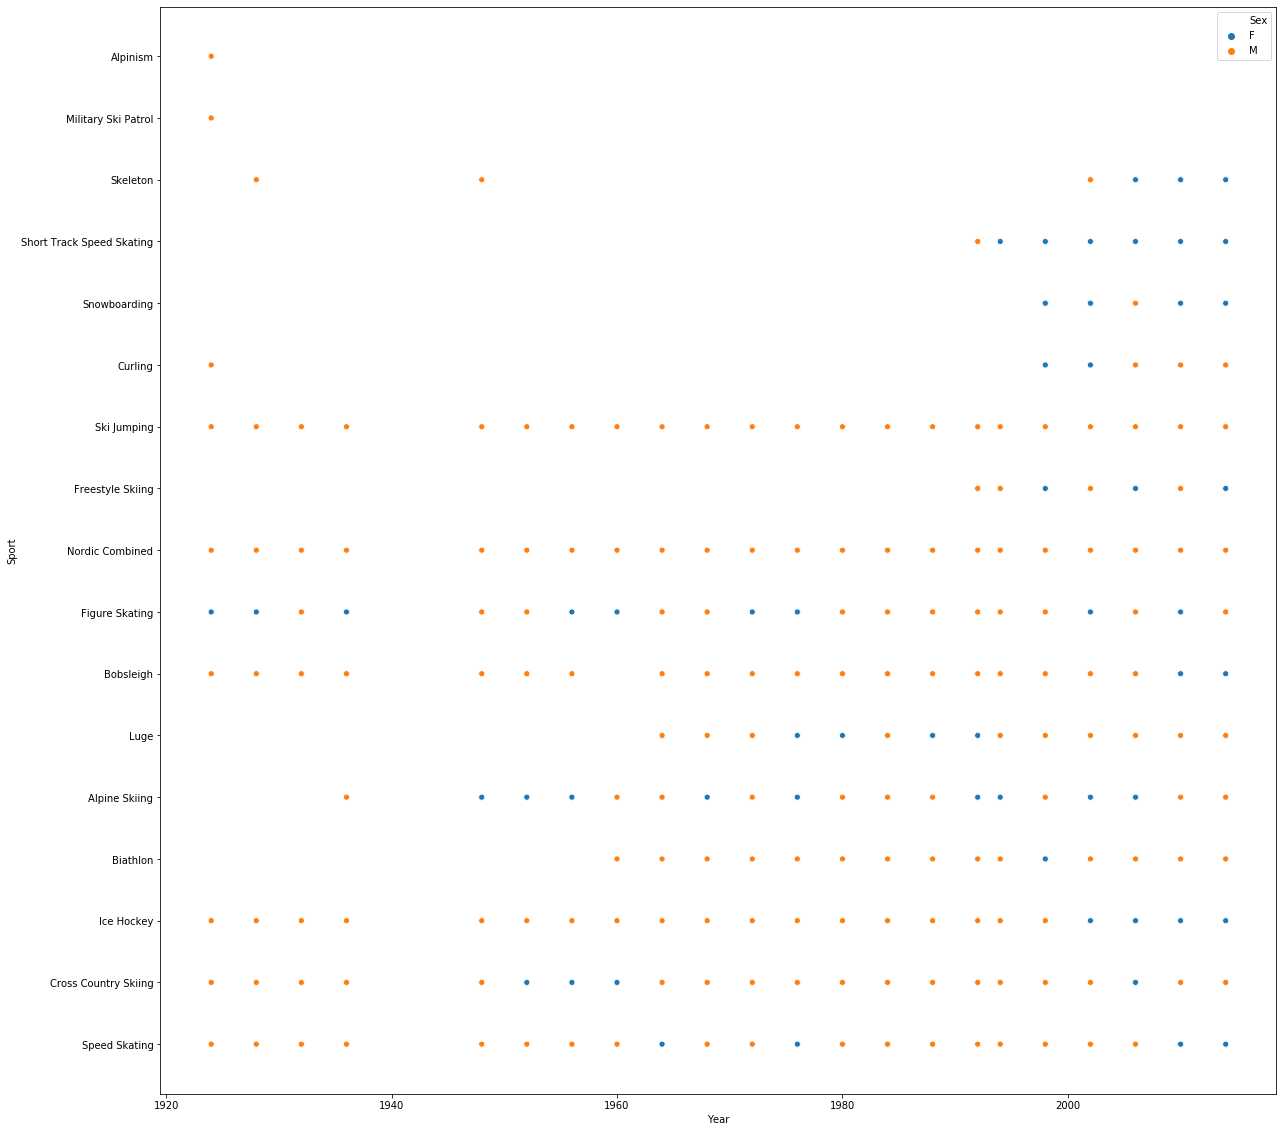

In [32]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Year',y='Sport',hue='Sex',data=winter_athe_df)
plt.show()

#####  Total  Analysis 

enter  country name:USA
***Country_wise Medals:*** 
    NOC  Gold  Silver  Bronze
0  USA  96.0    99.0    84.0
***region_wise Medals:*** 
     Year region  Gold  Silver  Bronze
0   1924    USA     1       2       1
1   1928    USA     2       2       2
2   1932    USA     6       4       2
3   1936    USA     1       0       3
4   1948    USA     3       3       2
5   1952    USA     4       6       1
6   1956    USA     2       3       2
7   1960    USA     3       4       3
8   1964    USA     1       2       4
9   1968    USA     1       3       1
10  1972    USA     3       2       3
11  1976    USA     3       3       4
12  1980    USA     6       4       2
13  1984    USA     4       4       0
14  1988    USA     2       1       3
15  1992    USA     5       4       2
16  1994    USA     6       5       2
17  1998    USA     6       3       4
18  2002    USA    10      13      11
19  2006    USA     9       9       7
20  2010    USA     9      15      13
21  2014    USA     9    

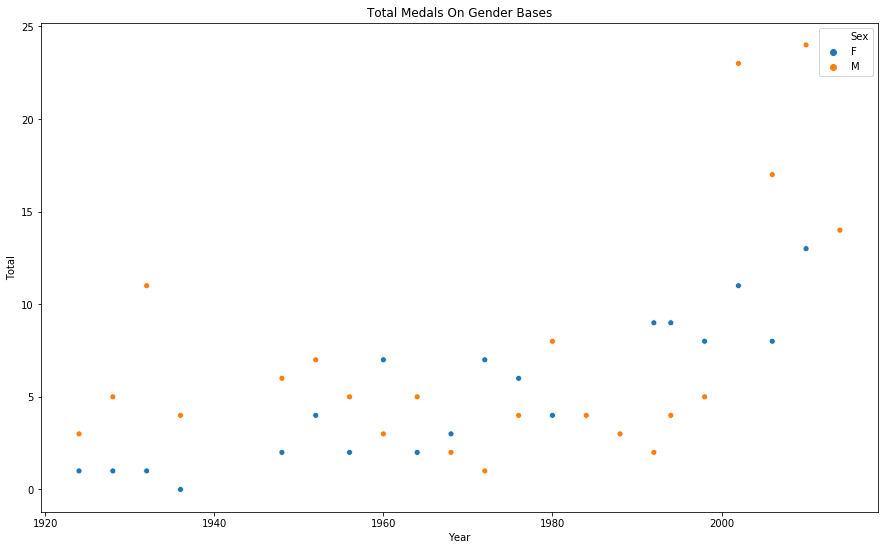

<Figure size 1080x648 with 0 Axes>

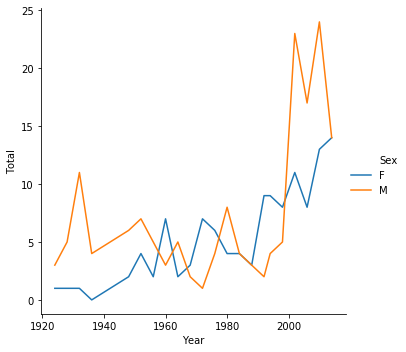

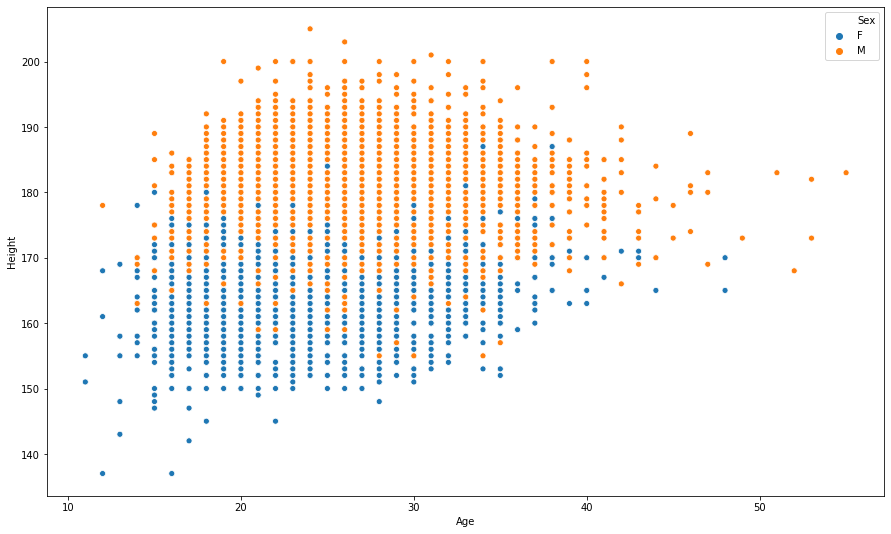

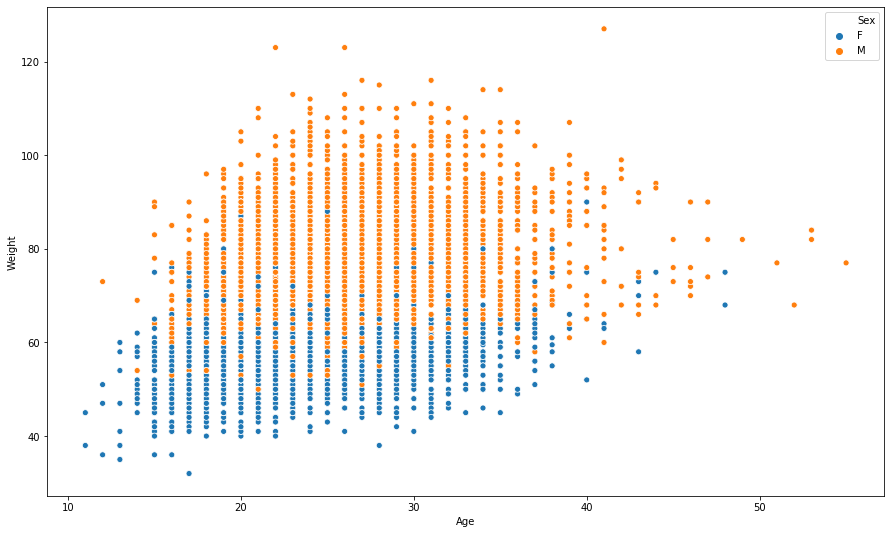

In [34]:
give=str(input("enter  country name:"))

def Country_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b= a.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    return b

print("***Country_wise Medals:***",'\n',Country_wise(give))
           
def Region_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Year','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***region_wise Medals:***",'\n',Region_wise(give))



def Event_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Year','Event']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***event_wise Medals:***",'\n',Event_wise(give))





def Name_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Year','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Name_wise Medals:***",'\n',Name_wise(give))




def City_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Name','City']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***City_wise Medals:***",'\n',City_wise(give))





def Sport_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Sport','Name']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Sport_wise Medals:***",'\n',Sport_wise(give))








def Info_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Year','Name','Event','City','region']).sum()[['Gold','Silver','Bronze']].reset_index()
    return b


print("***Info_wise Medals:***",'\n',Info_wise(give))



def Top_wise(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Name','region']).sum()[['Gold','Silver','Bronze','Total']]
    c=b.sort_values('Total', ascending=False).reset_index()
    d=c.loc[0:14]
    return d


print("***Top_15_wise Medals:***",'\n',Top_wise(give))



def country_scatterplot(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b = a.groupby(['Year','Sex','region']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    plt.figure(figsize=(15,9))
    c = sns.scatterplot(x=b['Year'], y=b['Total'], hue= b['Sex'])
    plt.title('Total Medals On Gender Bases')
    return c


print(country_scatterplot(give))


def country_lineplot(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Year','Sex']).sum()[['Gold','Silver','Bronze','Total']].reset_index()
    plt.figure(figsize=(15,9))
    result=sns.relplot(x='Year', y='Total', hue='Sex',data=b,kind='line')
    return result


print(country_lineplot(give))


def age_scatter(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=personality=winter_athe_df.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c=plt.figure(figsize=(15,9))
    c=sns.scatterplot(x='Age',y='Height',hue='Sex',data=personality)
    return c
print(age_scatter(give))





def age_scatter(give):
    a = winter_athe_df[winter_athe_df['region'] == give]
    b=a.groupby(['Name','Age','Sex','Height','Weight']).sum()[['Gold','Silver', 'Bronze', 'Total']].reset_index()
    c=plt.figure(figsize=(15,9))
    d=sns.scatterplot(x='Age',y='Weight',hue='Sex',data=personality)
    return d
age_scatter(give)

